In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
titanic = sns.load_dataset('titanic')
sns.set()
sns.set_style("ticks")
df = pd.read_json("messages.json")
# armydf = pd.read_json("armymessages.json")
# pedf = pd.read_json("darmymessages.json")
# df = pd.concat([pd.read_json("messages.json"),armydf,pedf])
df = df.reset_index()
listOfDf = []
def fullPrint(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
        print(df)

In [2]:
listOfDf.clear()
def addPerson(name,listOfIndex):
    column_names = ["month_year","with","content","month_year_chart"]
    tempDf = pd.DataFrame(columns = column_names)
    for i in listOfIndex:
        tempDf = pd.concat([tempDf,pd.DataFrame(df["conversation"][i])])
    tempDf['month_year_chart'] = pd.to_datetime(tempDf['created_at']).dt.to_period('D')
    tempDf['month_year'] = pd.to_datetime(tempDf['created_at'])
    tempDf["with"] = name;
    tempDf["content"] = "IG->"+tempDf['sender']+":"+tempDf['text']
    #tempDf = pd.DataFrame(tempDf, columns= ['month_year','with',"content","month_year_chart"])
    listOfDf.append(tempDf)

In [3]:
addPerson("chuangfi",[3,4,5,6,69])
addPerson("vwzxz",[2,38])
addPerson("pj.ko",[16,23])
addPerson("bobo",[19,24])
addPerson("dct",[27,42])
addPerson("mc",[55,56])
addPerson("chiance",[7,28,113])
addPerson("yo",[15,39])
addPerson("jenny",[60,90,112])
addPerson("chenghan",[62])
addPerson("morwee",[32,18])

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [4]:
column_names = ["month_year","with","content","month_year_chart"]
chatDatabaseDf = pd.DataFrame(columns = column_names)
for df in listOfDf:
    chatDatabaseDf = pd.concat([chatDatabaseDf,df])

import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import os
import json
from tqdm import tqdm
import csv
from datetime import datetime 
import pandas as pd
from pandas.io.json import json_normalize
%matplotlib inline

directory = "inbox"
folders = os.listdir(directory)

mesInd = {
"吳宜璇": "JennyWu",
"羅晰嫀": "chiance",
"郭仁山": "SamKuo",
"Phoenix Chuang": "Chuangfi",
"Darryn Celine Tsai": "darryn_et_al",
"柯柏任": "p.j.ko",
"陳姿羽": "Elzzbthh",
"Mckayla Li": "23826",
"秦元和": "bobochin1217",
"謝牧維": "Morwee",
"王兆瑋": "Alex",
"連啟崴": "Willy",
"莊承翰": "AndrewChuang"
    
}

if ".DS_Store" in folders:
    folders.remove(".DS_Store")

column_names = ["month_year","with","content","month_year_chart"]
mesdf = pd.DataFrame(columns = column_names)
    
for folder in tqdm(folders):
    print(folder)
    for filename in os.listdir(os.path.join(directory,folder)):
        if filename.startswith("message"):
            #print(os.path.join(directory,folder,filename))
            #fullPrint(ndf)
            with open(os.path.join(directory,folder,filename)) as json_data:
                data = json.load(json_data)
            ndf = pd.DataFrame(data['messages'])
            print(data['participants'][0]['name'].encode('latin').decode('utf-8'))
            if(data['participants'][0]['name']!='Henry Wu' or data['participants'][0]['name']!='henryw.0424' or data['participants'][0]['name']!='deep._.army' or data['participants'][0]['name']!='smeraldo_._._'):
                ndf['with'] = folder
            else:
                ndf['with'] = folder
            ndf['month_year'] = pd.to_datetime(ndf['timestamp_ms'], unit='ms')
            ndf['month_year_chart'] = pd.to_datetime(ndf['month_year']).dt.to_period('D')
            #print(ndf.columns)
            if 'content' in ndf.columns:
                ndf['content'] = ndf['content'].astype("string")
                ndf['content'] = ndf['content'].str.encode('latin')
                ndf['content'] = ndf['content'].str.decode('utf-8')
            ndf['sender_name'] = ndf['sender_name'].astype("string")
            ndf['sender_name'] = ndf['sender_name'].str.encode('latin')
            ndf['sender_name'] = ndf['sender_name'].str.decode('utf-8')
            if 'content' in ndf.columns:
                ndf['content'] = "Mes->" + ndf['sender_name'] + ":" + ndf['content']
            ndf = pd.DataFrame(ndf,columns=column_names)
            #print(ndf)
            mesdf = mesdf.append(ndf)
chatDatabaseDf = chatDatabaseDf.append(mesdf)

  7%|▋         | 1/14 [00:00<00:01,  8.66it/s]

jenny
M
吳宜璇
吳宜璇
小胎牛
pj.ko
Ko, Po-Jen
柯柏任
Ko, Po-Jen


 14%|█▍        | 2/14 [00:00<00:01,  8.15it/s]

對不起 但我對我畫的香香感到太自豪了 所以她必須成為我的頭像
柯柏任
aww
his_bright_side
王兆瑋
Alex W.
Alex W.
bobo
Andrew Chin
Andrew Chin
lil_and_jaw


 29%|██▊       | 4/14 [00:00<00:01,  7.17it/s]

Andrew Chin
Andrew Chin｜秦元和
Andrew Chin｜秦元和
Andrew Chin
serendipity
serendipityyyy______
serendipityyyy______
Jenny Huang
Jenny Huang
serendipityyyy______


 43%|████▎     | 6/14 [00:00<00:01,  6.65it/s]

yo
連啟崴
連啟崴
Willy
Willy
Yo
連啟崴
Yo
The Book
morwee
Morris謝牧維


 50%|█████     | 7/14 [00:00<00:00,  7.37it/s]

謝牧維
迪盧可莉
Morris謝牧維
謝牧維
chuangfi
Phoenix CJ
Phoenix CJ


 57%|█████▋    | 8/14 [00:01<00:01,  4.71it/s]

Phoenix CJ
mf__bunny
Phoenix CJ
Phoenix Chuang
Phoenix CJ
Phoenix CJ
mc
Mckaylalala 💚🥝


 71%|███████▏  | 10/14 [00:01<00:00,  6.15it/s]

Mckayla Li
Mckaylalala 💚🥝
dct
DCT 蔡得倫
Darryn Celine Tsai
DCT 蔡得倫
chiance
羅晰嫀


 79%|███████▊  | 11/14 [00:01<00:00,  5.19it/s]

羅晰嫀
羅晰嫀
羅晰嫀
羅晰嫀
羅晰嫀
renshan
郭仁山
郭仁山
Sk
郭仁山


 86%|████████▌ | 12/14 [00:01<00:00,  5.89it/s]

Sk
郭仁山
vwzxz
vwzxz
vwzxz
vwzxz
vwzxz
전정국
vwzxz
vwzxz
vwzxz
Elizabeth 陳姿羽
vwzxz
vwzxz
Elizabeth 陳姿羽
陳姿羽
陳姿羽
vwzxz


 93%|█████████▎| 13/14 [00:02<00:00,  2.58it/s]

陳姿羽
chenghan
莊承翰
Andrew C. 莊承翰
莊承翰
莊承翰


100%|██████████| 14/14 [00:03<00:00,  4.55it/s]


Andrew C. 莊承翰


In [5]:
testchatDatabase = pd.DataFrame(chatDatabaseDf.groupby(['with']).size())
testchatDatabase.columns = ["Count"]
testchatDatabase = testchatDatabase.sort_values(by=['Count'],ascending=False)
testchatDatabase

Count
with               
vwzxz        141391
chuangfi     112916
chiance       35791
bobo          31624
dct           20954
serendipity   20046
jenny         17655
yo            15945
chenghan      15635
mc            13498
pj.ko         12120
morwee        11188
aww            8932
renshan        6575

In [45]:
fullPrint(chatDatabaseDf)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [16]:
chatDatabaseDf['month'] = pd.to_datetime(chatDatabaseDf['month_year'], utc=True).dt.to_period('M')
gr = chatDatabaseDf.groupby(['with','month']).size().reset_index(name="Count")
fullPrint(gr)

            with    month  Count
0            aww  2017-06     44
1            aww  2017-07      8
2            aww  2017-09     25
3            aww  2017-11      7
4            aww  2017-12      3
5            aww  2018-01      9
6            aww  2018-02     27
7            aww  2018-03     19
8            aww  2018-04     27
9            aww  2018-05     53
10           aww  2018-06     77
11           aww  2018-07     86
12           aww  2018-08    144
13           aww  2018-09    151
14           aww  2018-10    171
15           aww  2018-11     60
16           aww  2018-12     30
17           aww  2019-01    270
18           aww  2019-02    182
19           aww  2019-03     51
20           aww  2019-04    693
21           aww  2019-05    615
22           aww  2019-06    138
23           aww  2019-07    624
24           aww  2019-08     42
25           aww  2019-09     29
26           aww  2019-10     17
27           aww  2019-11     70
28           aww  2019-12    234
29        

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


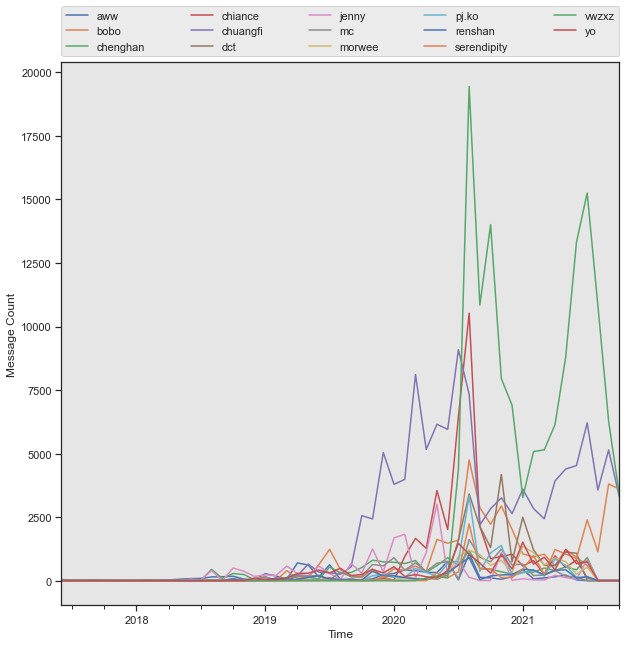

In [13]:
sns.set_style({"axes.facecolor": ".9"})
chatDatabaseDf['month'] = pd.to_datetime(chatDatabaseDf['month_year'], utc=True).dt.to_period('M')
#tooMuch = ["Chuangfi","Elzzbthh","chiance","bobochin1217","darryn_et_al","p.j.ko","JennyWu"]
#chatDatabaseDf['with'] = chatDatabaseDf['with'].astype(str)
#det = chatDatabaseDf['with'].isin(tooMuch)
gr = chatDatabaseDf.groupby(['with','month']).size().reset_index(name="Count")
piv = pd.pivot_table(gr,  values='Count',  columns=['with'],  
                         index = "month", aggfunc=np.sum,  fill_value=0)
#piv = piv.cumsum()
piv.plot(kind="line",figsize=(10,10))
plt.ylabel('Message Count');
plt.xlabel('Time')
plt.plot()
plt.legend(bbox_to_anchor=(0., 1., 1., .102), loc='upper left',
           ncol=5, mode="expand", borderaxespad=0.).get_figure().savefig('test.pdf')

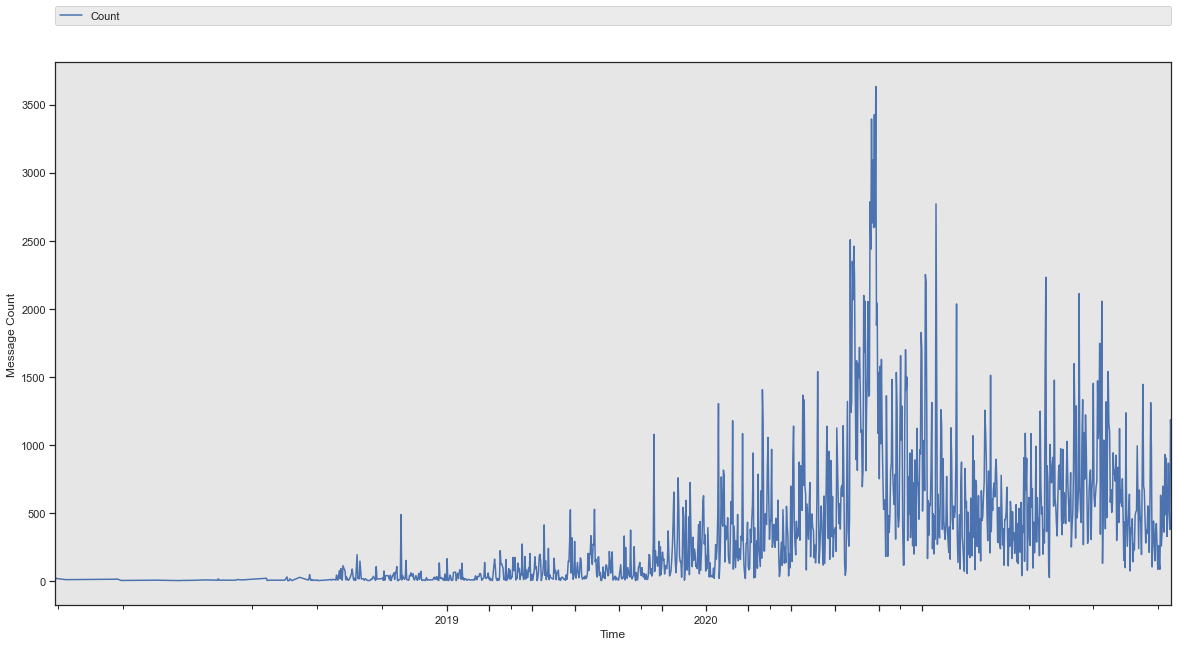

In [19]:


# Add labels to the plot
style = dict(size=10, color='gray')


gr = chatDatabaseDf.groupby(['month_year_chart']).size().reset_index(name="Count")
piv = pd.pivot_table(gr,  values='Count',   
                         index = "month_year_chart", aggfunc=np.sum,  fill_value=0)
fig, ax = plt.subplots(figsize=(20, 10))
piv.plot(kind="line", ax=ax)
plt.ylabel('Message Count')
plt.xticks(['2019-01','2019-03','2019-05','2019-07','2019-09','2019-11','2020-01','2020-03','2020-05','2020-07','2020-09','2020-11'])
plt.xlabel('Time')
plt.plot()
plt.legend(bbox_to_anchor=(0., 1., 1., .102), loc='upper left',
           ncol=10, mode="expand", borderaxespad=0.).get_figure().savefig('test.pdf')

In [ ]:
df = pd.read_json("messages.json")
armydf = pd.read_json("armymessages.json")
pedf = pd.read_json("darmymessages.json")
df = pd.concat([pd.read_json("messages.json"),armydf,pedf])
df = df.reset_index()
df

In [23]:
chatDatabaseDf

month_year      with                       content
0     2020-11-17 12:16:50.575902+00:00  chuangfi              IG->chuangfi:我口以
1     2020-11-17 11:53:49.006865+00:00  chuangfi            IG->henry.0424:我不行
2     2020-11-17 11:53:47.171871+00:00  chuangfi       IG->henry.0424:你這個認得出來ㄛ
3     2020-11-17 11:48:19.255502+00:00  chuangfi                           NaN
4     2020-11-17 11:43:35.999785+00:00  chuangfi  IG->chuangfi:但我覺得她把矮爾頭掰開比較好笑
...                                ...       ...                           ...
9995        2020-08-17 00:47:05.718000    vwwzxz        Mes->陳姿羽:然後下面有人說你好帥！！！
9996        2020-08-17 00:46:57.823000    vwwzxz                Mes->陳姿羽:在演唱會哭
9997        2020-08-17 00:46:54.874000    vwwzxz                Mes->陳姿羽:之前田柾國
9998        2020-08-17 00:46:52.106000    vwwzxz                Mes->陳姿羽:超好笑的乾
9999        2020-08-17 00:46:45.289000    vwwzxz            Mes->Henry Wu:對我好帥

[386624 rows x 3 columns]

In [6]:
import pytz
counterdf = chatDatabaseDf[chatDatabaseDf["with"].str.startswith("chuangf")]
counterdf = counterdf[counterdf["content"].notnull()]
counterdf.reset_index(drop=True)
counterdf['month_year'] = pd.to_datetime(counterdf['month_year'], utc = True).apply(lambda x: x.replace(tzinfo=None)) 
old_timezone = pytz.timezone("Etc/GMT")
new_timezone = pytz.timezone("Asia/Taipei")
#counterdf.sort_values(by='month_year')
# for index, text in zip(counterdf.index, counterdf['content']):
#     try:
#         counterdf.at[index,'content'] = text.encode('latin')
#         counterdf.at[index,'content'] = counterdf.at[index,'content'].str.decode('utf-8')
#     except:
#         pass
#counterdf = counterdf[counterdf["content"].str.contains("vw")]


#counterdf.content.str.count(";").sum()
listOfTime = []
for index, value in zip(counterdf.index, counterdf['month_year']):
    try:
        listOfTime.append(old_timezone.localize(value).astimezone(new_timezone))
        #print(listOfTime[-1])
    except:
        listOfTime.append(value)
counterdf['month_year'] = counterdf['month_year'].replace(list(counterdf['month_year']),listOfTime)
counterdf['month_year'] = pd.to_datetime(counterdf['month_year']).dt.to_period('S')
counterdf.sort_values(by='month_year').to_excel(r'fi.xlsx', index = False)
fullPrint(counterdf.sort_values(by='month_year'))

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1101: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [45]:
fullPrint(chatDatabaseDf[chatDatabaseDf["with"].str.startswith("vw")].sort_values(by='month_year'))

       month_year    with                                            content
8335   2018-08-02  vwwzxz    ä½ åç¾å¨å¯ä»¥ä½¿ç¨ Messenger äºç¸è¯ç¹«
22008  2018-12-24  vwwzxz                              IG->henry.0424:他應該是打錯
22007  2018-12-24  vwwzxz                     IG->henry.0424:應該是c'est la vie
22006  2018-12-24  vwwzxz                              IG->henry.0424:人生就是如此
22005  2018-12-24  vwwzxz                                IG->elzzbthh:喔喔～ 謝啦
21996  2019-05-11  vwwzxz                                 IG->henry.0424:分開弄
21994  2019-05-11  vwwzxz                                 IG->henry.0424:可以啊
21995  2019-05-11  vwwzxz                                IG->elzzbthh:在yt上用嗎
21997  2019-05-11  vwwzxz                            IG->henry.0424:字幕可以不用那個
21998  2019-05-11  vwwzxz                                 IG->elzzbthh:字幕的部分
21999  2019-05-11  vwwzxz                                 IG->elzzbthh:那個好用嗎
22002  2019-05-11  vwwzxz                      IG->henry.0424:如果是的話用imovie就好

In [ ]:
realcounterdf = chatDatabaseDf[chatDatabaseDf["with"].str.startswith("chian")]
realcounterdf = realcounterdf[realcounterdf["content"].notnull()]
realcounterdf = realcounterdf[realcounterdf["content"].str.contains("▽")]
realcounterdf.content.str.count("▽").sum()

In [ ]:
fidf = pd.DataFrame(pd.concat([pd.DataFrame(df["conversation"][5]),pd.DataFrame(df["conversation"][6]),pd.DataFrame(df["conversation"][3]),pd.DataFrame(df["conversation"][4]),pd.DataFrame(df["conversation"][69])]))

In [ ]:
elzdf = pd.DataFrame(chatDatabaseDf["with"].str.startswith("vw"))
elzdf['month_year'] = pd.to_datetime(elzdf['created_at']).dt.to_period('M')

In [ ]:
elzelzdf = elzdf[(elzdf['sender'] != 'henry.0424')]
len(elzelzdf)

In [ ]:
henelzdf = elzdf[(elzdf['sender'] == 'henry.0424')]
len(henelzdf)

In [ ]:
pjdf = pd.DataFrame(df["conversation"][16])
pjdf['month_year'] = pd.to_datetime(pjdf['created_at']).dt.to_period('M')
pjpjdf = pjdf[(pjdf['sender']=='p.j.ko')]
hwpjdf = pjdf[(pjdf['sender']!='p.j.ko')]
len(pjpjdf)
len(hwpjdf)

In [ ]:
fifidf = fidf[(fidf['sender']=='chuangfi')]
hwfidf = fidf[(fidf['sender']!='chuangfi')]
fidf['month_year'] = pd.to_datetime(fidf['created_at']).dt.to_period('M')
len(fifidf)
len(hwfidf)

In [ ]:
fidf.groupby(fidf["month_year"])["sender"].count().plot(legend=None,kind="line")

In [ ]:
pjdf.groupby(pjdf["month_year"])["sender"].count().plot(legend=None,kind="line")

In [ ]:
fidf["with"] = "Friend A"
pjdf["with"] = "Friend C"
chatdf = pd.DataFrame(fidf, columns= ['month_year','with'])



In [ ]:
mcdf = pd.DataFrame(pd.concat([pd.DataFrame(df["conversation"][55]),pd.DataFrame(df["conversation"][56])]))
mcdf['month_year'] = pd.to_datetime(mcdf['created_at']).dt.to_period('M')
mcdf["with"] = "Friend D"
mcdf = pd.DataFrame(mcdf, columns= ['month_year','with'])

In [ ]:
elzdf = pd.DataFrame(pd.concat([pd.DataFrame(df["conversation"][2]),pd.DataFrame(df["conversation"][38])]))
elzdf['month_year'] = pd.to_datetime(elzdf['created_at']).dt.to_period('M')
elzdf["with"] = "Friend B"
elzdf = pd.DataFrame(elzdf, columns= ['month_year','with'])

In [ ]:
dardf = pd.DataFrame(df["conversation"][27])
dardf['month_year'] = pd.to_datetime(dardf['created_at']).dt.to_period('M')
dardf["with"] = "Friend E"
dardf = pd.DataFrame(dardf, columns= ['month_year','with'])

In [ ]:
pjdf = pd.DataFrame(pd.concat([pd.DataFrame(df["conversation"][16]),pd.DataFrame(df["conversation"][23])]))
pjdf['month_year'] = pd.to_datetime(pjdf['created_at']).dt.to_period('M')
pjdf["with"] = "Goldman"
pjdf = pd.DataFrame(pjdf, columns= ['month_year','with'])

In [ ]:
bodf = pd.DataFrame(pd.concat([pd.DataFrame(df["conversation"][24]),pd.DataFrame(df["conversation"][19])]))
bodf['month_year'] = pd.to_datetime(bodf['created_at']).dt.to_period('M')
bodf["with"] = "Bobo"
bodf = pd.DataFrame(bodf, columns= ['month_year','with'])

In [ ]:
chatDataDf = pd.DataFrame(fidf, columns= ['month_year','with'])
chatDataDf = pd.concat([chatDataDf,mcdf])
chatDataDf = pd.concat([chatDataDf,bodf])
chatDataDf = pd.concat([chatDataDf,pjdf])
chatDataDf = pd.concat([chatDataDf,dardf])
chatDataDf = pd.concat([chatDataDf,elzdf])
chatDataDf["with"].unique()
chatDataDf

In [ ]:
gr = chatDataDf.groupby(['with','month_year']).size().reset_index(name="Count")

piv = pd.pivot_table(gr,values='Count',columns=['with'],index = "month_year",aggfunc=np.sum,fill_value=0)
piv.plot(kind="line")
plt.show()

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(chatDatabaseDf.groupby(['with','month_year']).size())

In [ ]:
def addPersonWithContent(name,listOfIndex):
    column_names = ["month_year","with","content"]
    tempDf = pd.DataFrame(columns = column_names)
    for i in listOfIndex:
        tempDf = pd.concat([tempDf,pd.DataFrame(df["conversation"][i])])
    tempDf['month_year'] = pd.to_datetime(tempDf['created_at']).dt.to_period('M')
    tempDf["with"] = name;
    tempDf["content"] = tempDf['text']
    tempDf = pd.DataFrame(tempDf, columns= ['month_year','with','content'])
    return tempDf
elzdf = addPersonWithContent("Elzzbthh",[2,38,159,162,174,175])

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(elzdf)